# Naive Bayes Model

In [1]:
# example of preparing and making a prediction with a naive bayes model
from sklearn.datasets import make_blobs
from scipy.stats import norm
from numpy import mean
from numpy import std
 
# fit a probability distribution to a univariate data sample
def fit_distribution(data):
 # estimate parameters
 mu = mean(data)
 sigma = std(data)
 print(mu, sigma)
 # fit distribution
 dist = norm(mu, sigma)
 return dist
 
# calculate the independent conditional probability
def probability(X, prior, dist1, dist2):
 return prior * dist1.pdf(X[0]) * dist2.pdf(X[1])
 
# generate 2d classification dataset
X, y = make_blobs(n_samples=100, centers=2, n_features=2, random_state=1)
# sort data into classes
Xy0 = X[y == 0]
Xy1 = X[y == 1]
# calculate priors
priory0 = len(Xy0) / len(X)
priory1 = len(Xy1) / len(X)
# create PDFs for y==0
distX1y0 = fit_distribution(Xy0[:, 0])
distX2y0 = fit_distribution(Xy0[:, 1])
# create PDFs for y==1
distX1y1 = fit_distribution(Xy1[:, 0])
distX2y1 = fit_distribution(Xy1[:, 1])
# classify one example
Xsample, ysample = X[0], y[0]
py0 = probability(Xsample, priory0, distX1y0, distX2y0)
py1 = probability(Xsample, priory1, distX1y1, distX2y1)
print('P(y=0 | %s) = %.3f' % (Xsample, py0*100))
print('P(y=1 | %s) = %.3f' % (Xsample, py1*100))
print('Truth: y=%d' % ysample)

-1.5632888906409914 0.787444265443213
4.426680361487157 0.958296071258367
-9.681177100524485 0.8943078901048118
-3.9713794295185845 0.9308177595208521
P(y=0 | [-0.79415228  2.10495117]) = 0.348
P(y=1 | [-0.79415228  2.10495117]) = 0.000
Truth: y=0


# Gaussian Naive Bayes model (GaussianNB)

In [2]:
from sklearn.datasets import make_blobs
from sklearn.naive_bayes import GaussianNB
# generate 2d classification dataset
X, y = make_blobs(n_samples=100, centers=2, n_features=2, random_state=1)
# define the model
model = GaussianNB()
# fit the model
model.fit(X, y)
# select a single sample
Xsample, ysample = [X[0]], y[0]
# make a probabilistic prediction
yhat_prob = model.predict_proba(Xsample)
print('Predicted Probabilities: ', yhat_prob)
# make a classification prediction
yhat_class = model.predict(Xsample)
print('Predicted Class: ', yhat_class)
print('Truth: y=%d' % ysample)

Predicted Probabilities:  [[1.00000000e+00 5.52387327e-30]]
Predicted Class:  [0]
Truth: y=0


# SVM

In [1]:
import numpy as np
import pandas as pd
import random
import time
import matplotlib.pyplot as plt
%matplotlib inline

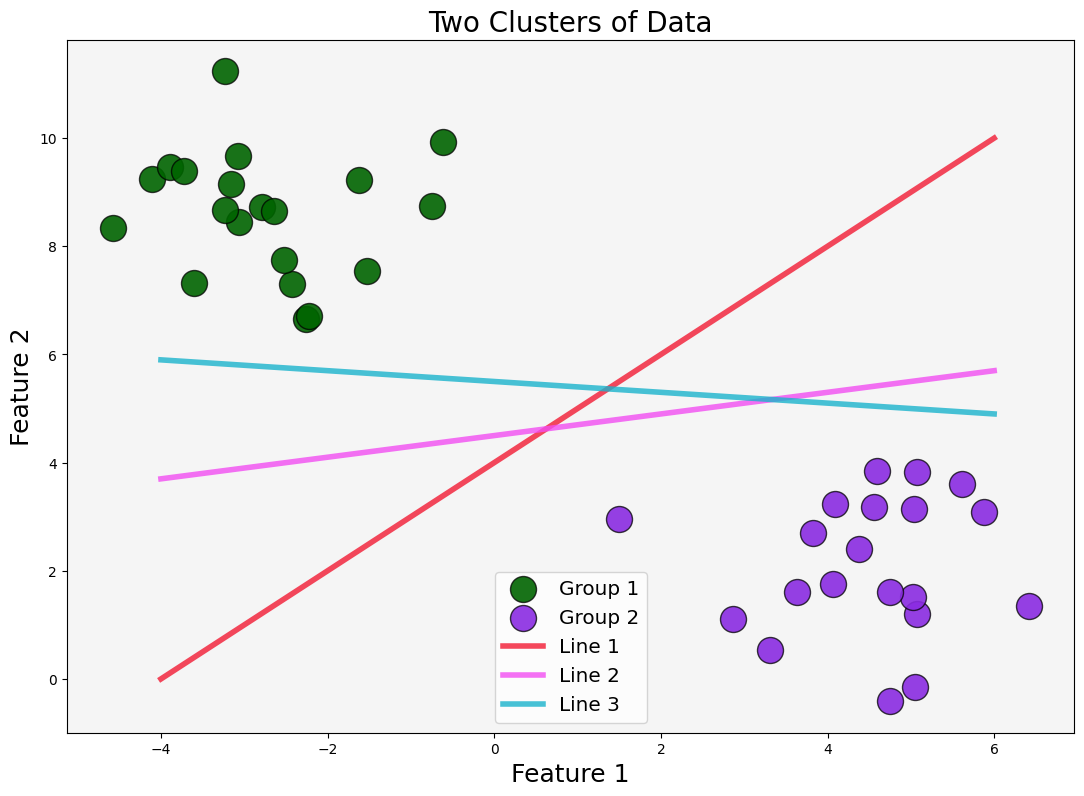

In [6]:
from sklearn.datasets import make_blobs

X,Y = make_blobs(n_samples= 40, centers = 2, cluster_std=1.2, n_features=2, random_state=42) 

for i,j in enumerate(Y):
  if j == 0:
    Y[i] = -1
  if j == 1:
    Y[i] = 1

df = pd.DataFrame(dict(x=X[:,0], y =X[:,1], label = Y))
names = {-1:'Group 1', 1:'Group 2'}
colors = {-1:(0,100/255,0,0.9), 1:(138/255,43/255,226/255,0.9)}
grouped = df.groupby('label')

ex_line_x1 = np.linspace(-4,6, 100)
ex_line_y1 = 1*ex_line_x1+4
ex_line_x2 = np.linspace(-4,6,100)
ex_line_y2 = 0.2*ex_line_x2+4.5
ex_line_x3 = np.linspace(-4,6,100)
ex_line_y3 = -0.1*ex_line_x3+5.5

fig = plt.figure(figsize=(13,9))
ax = fig.add_subplot(1,1,1)
ax.set_title("Two Clusters of Data", fontsize = 20)
ax.set_xlabel("Feature 1", fontsize = 18)
ax.set_ylabel("Feature 2", fontsize = 18)
ax.set_facecolor((245/255,245/255,245/255))

for key, group in grouped:
  ax.scatter(group.x, group.y, label=names[key], color=colors[key], edgecolor=(0,0,0,0.75), s=350)
ax.plot(ex_line_x1, ex_line_y1, color=(0.95, 0.1, 0.2, 0.8), label = 'Line 1', linewidth = 4)
ax.plot(ex_line_x2, ex_line_y2, color = (0.95, 0.3, 0.95, 0.8), label = 'Line 2', linewidth = 4)
ax.plot(ex_line_x3, ex_line_y3, color = (0.1, 0.7, 0.8, 0.8), label = 'Line 3', linewidth = 4)
ax.legend(markerscale = 1, fontsize = 'x-large')
plt.show()

In [11]:
# prepare datasets
x_test =X[20:]
x_test = np.c_[x_test,np.ones(len(x_test))]
y_test = Y[20:]

x = X[:20]
y = Y[:20]
# group for plotting
df_train = pd.DataFrame(dict(x=x[:,0], y=x[:,1], label=y))
grouped_train =df_train.groupby('label')

# add bias to sample vectors
x = np.c_[x, np.ones(len(x))]

# initialize weight vector
w = np.zeros(len(x[0]))

In [12]:
# learning rate
lam = 0.001
# array of number for shuffling
order = np.arange(0,len(x),1)

margin_current = 0
margin_previous =-10
pos_support_vectors = 0
neg_support_vectors = 0

not_coverged = True
t =0
start_time = time.time()

In [13]:
while(not_coverged):
    margin_previous = margin_current
    t +=1
    pos_support_vectors = 0
    neg_support_vectors = 0
    eta = 1/(lam*t)
    fac = (1-(eta*lam))*w
    random.shuffle(order)
    for i in order:
        prediction = np.dot(x[i],w)

        # check for support vectors
        if (round((prediction),1)==1):
            pos_support_vectors +=1
        if (round((prediction),1)==-1):
            neg_support_vectors +=1
        
        # misclassification
        if (y[i]*prediction) < 1:
            w = fac + eta*y[i]*x[i]
        # correct classification
        else:
            w = fac
    if (t>10000):
        margin_current =np.linalg.norm(w)
        if((pos_support_vectors >0) and (neg_support_vectors >0) and((margin_current-margin_previous)<0.01)):
            not_coverged = False
# print runtime
print("---%s seconds ---"% (time.time()-start_time))

---12.692652225494385 seconds ---


In [17]:
# create grid to draw decision boundary
grid_res = 200
xline = np.linspace(min(X[:,0]-(0.5*np.std(X[:,0]))), max(X[:,0]+(0.5*np.std(X[:,0]))), grid_res)
yline = np.linspace(min(X[:,1]-(0.5*np.std(X[:,1]))), max(X[:,1]+(0.5*np.std(X[:,1]))), grid_res)
grid = []
gridy =[]
for i in range(grid_res):
    for j in range(grid_res):
        grid.append([xline[i],yline[j]])
        if (np.dot(w,[xline[i],yline[j],1]))<1:
            gridy.append((138/255,43/255,226/255,0.1))
        elif (np.dot(w,[xline[i],yline[j],1]))<-1:
            gridy.append((0,100/255,0,0.1))
        elif (round((np.dot(w,[xline[i],yline[j],1])),2)==0):
            gridy.append((245/255,245/255,245/255))

grid = np.asarray(grid)
gridy = np.asarray(gridy)

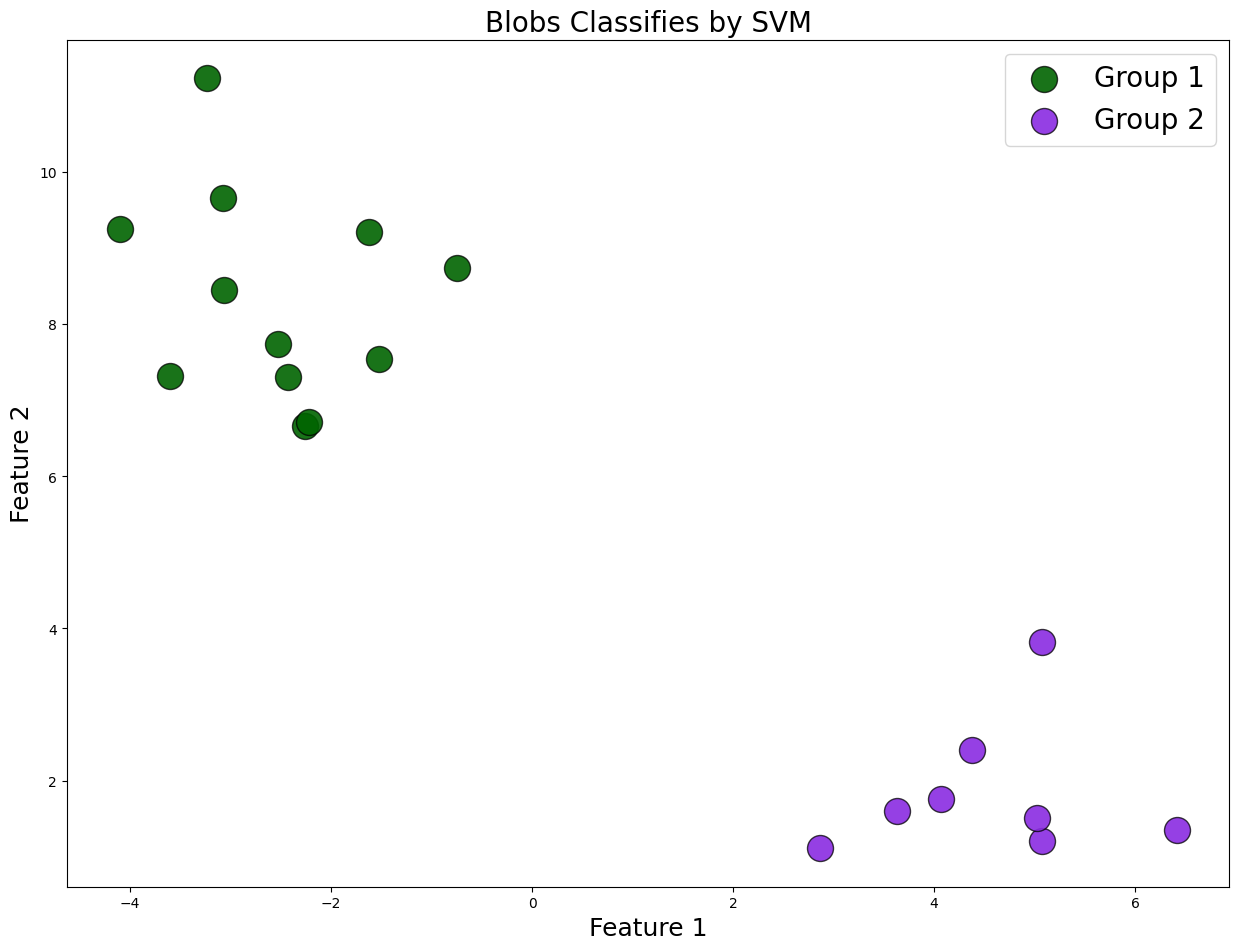

In [24]:
# plot the data
fig = plt.figure(figsize=(15,11))
ax =fig.add_subplot(1,1,1)
ax.set_title("Blobs Classifies by SVM", fontsize = 20)
ax.set_xlabel('Feature 1', fontsize = 18)
ax.set_ylabel('Feature 2', fontsize = 18)
#ax.scatter(grid[:,0], grid[:,1], marker='o', c=gridy, s=10)
for key, group in grouped_train:
  ax.scatter(group.x, group.y, label=names[key], color=colors[key], edgecolor=(0,0,0,0.75), s=350)
ax.legend(markerscale = 1, fontsize = 20, fancybox=True)
plt.show() 

In [26]:
# test classifier on test set
y_pred = ([])
for i in x_test:
  pred = np.dot(w,i)
  if(pred > 0):
    {y_pred.append(1)}
  elif(pred < 0):
    y_pred.append(-1)
y_pred_labels = ([])
for i, val in enumerate(y_pred):
  if(y_test[i] == y_pred[i]):
    y_pred_labels.append(1)
  else:
    y_pred_labels.append(0) 

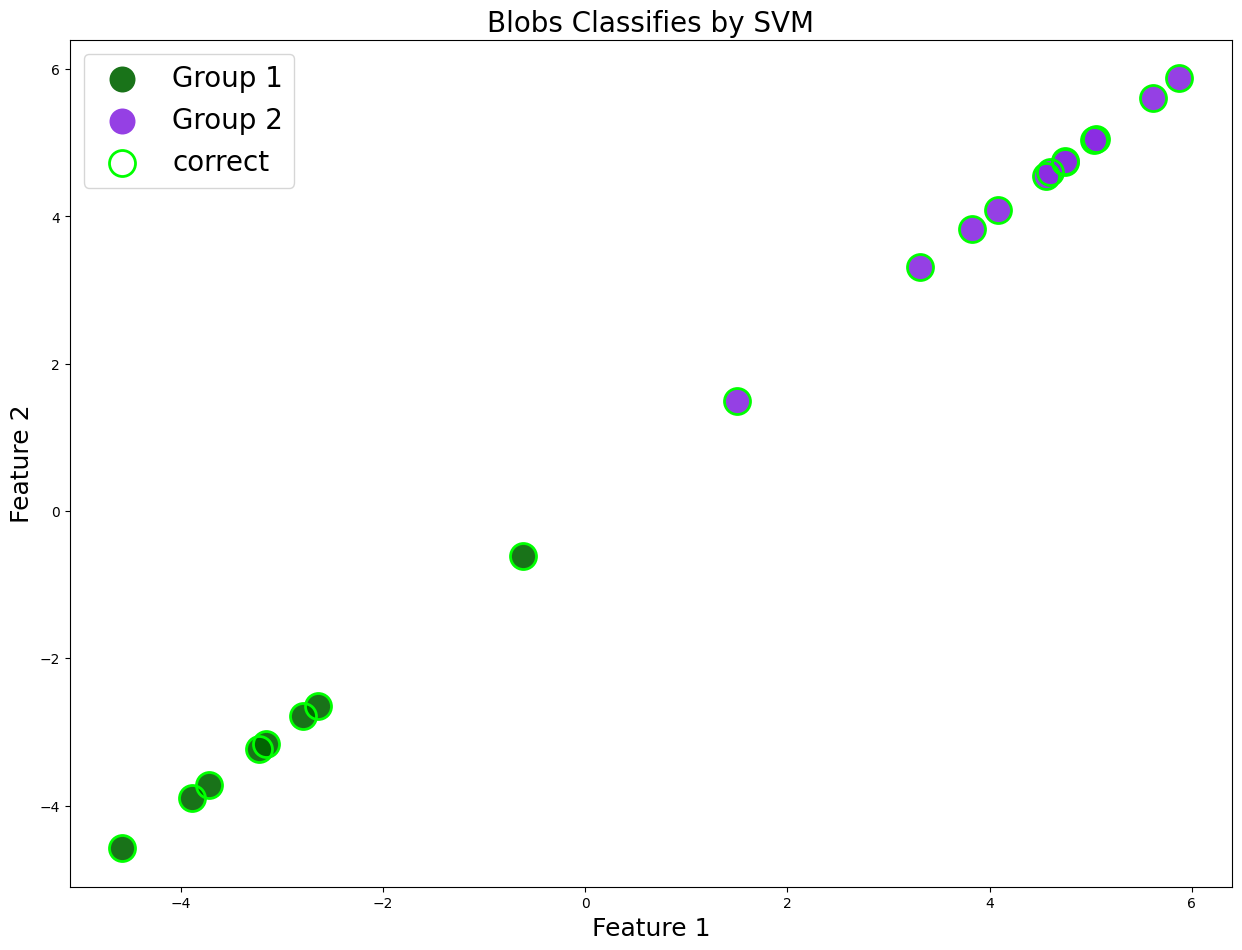

In [29]:
df_test = pd.DataFrame(dict(x=x_test[:,0], y=x_test[:,0], pred=y_pred_labels, label=y_test))
grouped_test = df_test.groupby('label')
grouped_pred = df_test.groupby('pred')
pred_colors = {1:'lime', 0:'red'}
pred_names = {1:'correct', 0:'incorrect'}

# plot the data
fig = plt.figure(figsize=(15,11))
ax =fig.add_subplot(1,1,1)
ax.set_title("Blobs Classifies by SVM", fontsize = 20)
ax.set_xlabel('Feature 1', fontsize = 18)
ax.set_ylabel('Feature 2', fontsize = 18)
#ax.scatter(grid[:,0], grid[:,1], marker='o', c=gridy, s=10)
for key, group in grouped_test:
  ax.scatter(group.x, group.y, label=names[key], color=colors[key], edgecolor=(0,0,0,0), s=350)
for key, group in grouped_pred:
  ax.scatter(group.x, group.y, label=pred_names[key], edgecolor=pred_colors[key], color=(0,0,0,0), s=350, linewidths=2)
ax.legend(markerscale = 1, fontsize = 20, fancybox=True)
plt.show() 